# Введение в аналитику. Домашнее задание - 1

Мы будем работать с датасетом про покупки клиентов в онлайн-магазине. По характеристикам клиентов нам нужно понять, купит клиент товар или нет.

Целевая величина - Revenue (факт покупки).

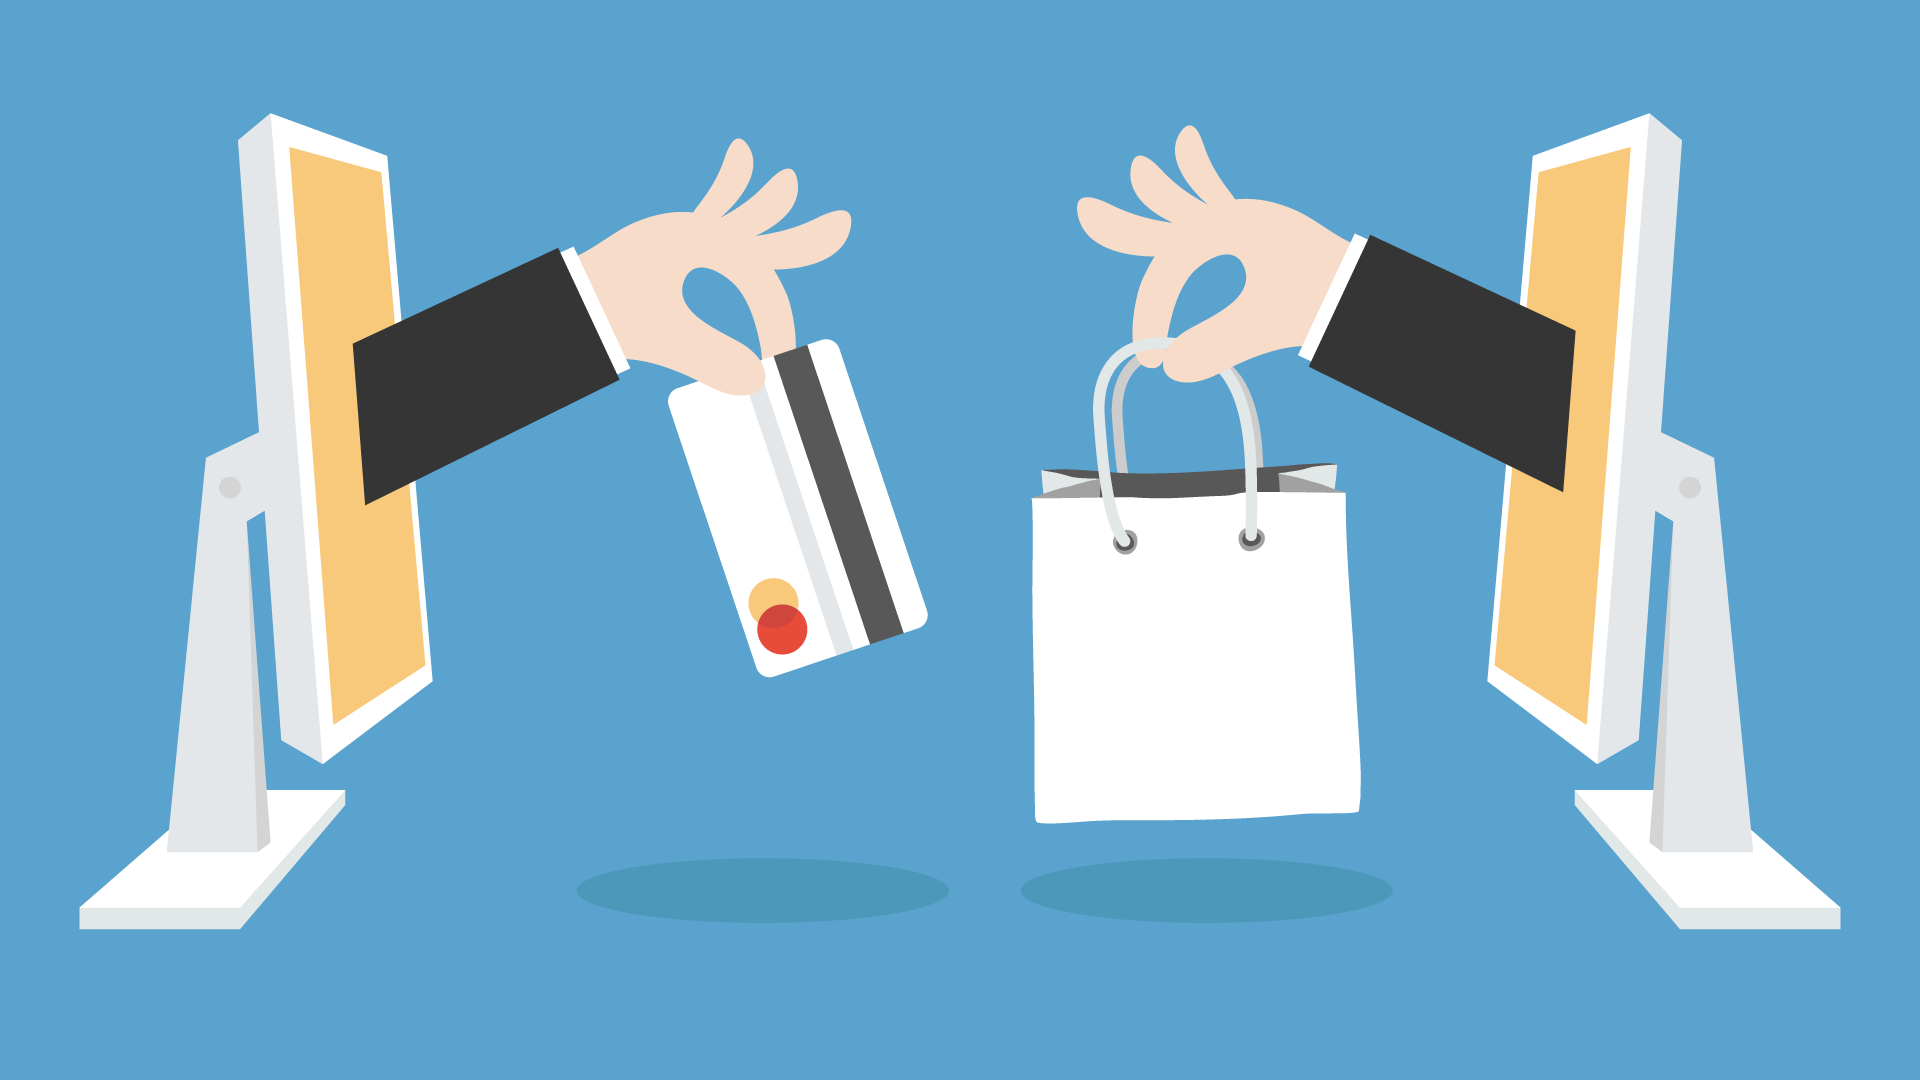

Задания ноутбука проверяются в гугл-формах в полуавтоматическом режиме. Ответы на вопросы, а также ссылку на ноутбук с выполненным домашнем задании в google colab прикрепите в [эту форму](https://docs.google.com/forms/d/e/1FAIpQLSdo_QG4Msqsvxhbd-GsAr8orBhByo1Sg9Y4RtzBX2w5FN43QQ/viewform?usp=sf_link).

* Задание 0 не оценивается
* Задания 1-16 весят 1 балл
* Задания 17-18 весят по 2 балла

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Описание данных

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Задание 0

Изучите данные:

* Посмотрите на названия колонок

* Выведите на экран 10 случайных строк таблицы

* Посмотрите на размер таблицы

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7320,4,464.5,0,0.0,9,635.723810,0.000000,0.002778,0.000,0.0,Jul,1,1,3,2,New_Visitor,False,False
9917,0,0.0,0,0.0,2,11.000000,0.000000,0.100000,0.000,0.0,Nov,3,2,1,10,Returning_Visitor,False,False
3777,0,0.0,0,0.0,2,1207.000000,0.000000,0.050000,0.000,0.0,May,3,3,3,1,Returning_Visitor,False,False
1338,0,0.0,0,0.0,36,1166.726190,0.000000,0.025000,4.599,0.0,Mar,1,1,1,3,Returning_Visitor,True,True
5896,0,0.0,0,0.0,5,186.066667,0.146667,0.159524,0.000,0.0,June,3,2,1,13,Returning_Visitor,False,False
4513,1,132.0,0,0.0,8,209.250000,0.000000,0.022222,0.000,0.0,May,2,2,7,6,Returning_Visitor,False,False
1871,0,0.0,0,0.0,11,NaN,0.036364,0.047107,0.000,0.0,Mar,1,1,2,1,Returning_Visitor,False,False
6145,2,28.2,1,0.0,114,3161.074762,0.017699,0.042576,0.000,0.0,Aug,2,2,2,1,Returning_Visitor,False,False
7700,0,0.0,0,0.0,16,213.800000,0.006250,0.068750,0.000,0.0,Aug,2,2,1,4,Returning_Visitor,False,True
1447,0,0.0,0,0.0,4,93.000000,0.000000,0.100000,0.000,0.0,Mar,2,2,9,6,Returning_Visitor,False,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
numerical = ['Administrative', 'Administrative_Duration', 'Informational',
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month', 'OperatingSystems', 'Browser', 'Region',
               'TrafficType', 'VisitorType', 'Weekend']
target = ['Revenue']

In [ ]:
df['OperatingSystems'].unique()

array([1, 2, 4, 3, 7, 6, 8, 5])

In [ ]:
df['Browser'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11])

In [ ]:
df['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
df['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

## Исследование данных

## Задание 1

В скольких столбцах таблицы есть пропущенные значения?

In [ ]:
df.info() # Informational_Duration, ProductRelated_Duration, ExitRates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df[df['Informational_Duration'].isna()].sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3606,0,0.00,0,NaN,4,33.000000,0.100000,0.150000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
7074,1,128.00,2,NaN,13,847.614286,0.013333,0.021667,0.000000,0.0,Oct,3,2,8,4,Returning_Visitor,True,False
5261,1,30.00,3,NaN,99,3072.305403,0.001961,0.020507,7.300657,0.0,May,2,2,1,1,Returning_Visitor,True,False
7491,0,0.00,0,NaN,14,390.900000,0.013333,0.066667,0.000000,0.0,Aug,2,2,6,3,Returning_Visitor,False,False
158,0,0.00,0,NaN,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
6319,8,115.20,1,NaN,18,436.600000,0.008696,0.008696,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False,False
130,0,0.00,0,NaN,2,222.000000,0.000000,0.100000,0.000000,0.0,Feb,2,6,1,2,Returning_Visitor,True,False
226,5,74.25,2,NaN,37,1599.083333,0.000000,0.006579,0.000000,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
3229,2,55.00,0,NaN,16,1851.500000,0.023529,0.041176,0.000000,0.0,May,2,5,1,1,Returning_Visitor,False,False
2785,0,0.00,0,NaN,25,319.333333,0.016667,0.036667,10.444500,0.0,May,2,5,5,1,Returning_Visitor,False,True


In [ ]:
df[df['ProductRelated_Duration'].isna()].sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1289,0,0.000000,0,0.0,5,NaN,0.146667,0.186667,0.000000,0.0,Mar,3,2,7,3,Returning_Visitor,False,False
6066,14,1220.914286,4,1005.4,280,NaN,0.017486,0.038980,5.697659,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
8664,4,209.062500,0,0.0,71,NaN,0.005128,0.026239,0.000000,0.0,Nov,2,2,2,2,Returning_Visitor,False,False
864,0,0.000000,0,0.0,3,NaN,0.000000,0.033333,0.000000,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
6650,1,20.200000,0,0.0,77,NaN,0.002597,0.017042,18.748602,0.0,Sep,2,2,7,1,Returning_Visitor,False,True
10225,4,101.333333,7,693.5,171,NaN,0.004420,0.021628,0.686565,0.0,Dec,2,2,3,10,Returning_Visitor,False,False
2221,2,2.000000,0,0.0,0,NaN,0.100000,0.100000,0.000000,0.0,May,1,1,3,2,Returning_Visitor,True,False
12015,0,0.000000,0,0.0,12,NaN,0.000000,0.016667,0.000000,0.0,Dec,8,1,3,1,Returning_Visitor,True,False
5205,2,37.000000,0,0.0,36,NaN,0.002857,0.012698,10.872129,0.0,May,2,4,6,2,Returning_Visitor,False,True
2560,9,331.166667,4,154.0,154,NaN,0.007333,0.027963,0.000000,0.0,May,2,2,1,5,Returning_Visitor,False,False


In [ ]:
df[df['ExitRates'].isna()].sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6729,2,76.600000,0,0.000000,38,3872.716667,0.000000,NaN,0.000000,0.0,Aug,2,2,3,2,New_Visitor,False,False
7922,0,0.000000,0,0.000000,30,360.473333,0.013333,NaN,0.000000,0.0,Jul,1,1,1,3,Returning_Visitor,False,False
5103,0,0.000000,0,0.000000,44,2588.500000,0.019048,NaN,0.000000,0.8,May,3,2,1,4,Returning_Visitor,False,False
5742,2,22.200000,0,0.000000,18,470.896667,0.000000,NaN,0.000000,0.0,Nov,2,2,2,4,New_Visitor,False,False
6793,10,215.244507,2,245.171429,101,3558.576942,0.008636,NaN,30.872272,0.0,Sep,3,2,1,2,Returning_Visitor,True,True
6641,5,161.107692,5,108.300000,44,2982.063248,0.016352,NaN,5.721365,0.0,Nov,1,1,4,1,Returning_Visitor,False,True
10407,2,14.000000,0,0.000000,81,1441.910588,0.002469,NaN,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
11436,7,119.566667,0,0.000000,25,499.608333,0.004167,NaN,0.000000,0.0,Nov,1,1,1,8,Returning_Visitor,False,False
8162,0,0.000000,0,0.000000,3,41.500000,0.066667,NaN,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,True,False
12205,1,7.000000,0,0.000000,21,803.000000,0.031579,NaN,7.014753,0.0,Nov,3,2,3,3,Returning_Visitor,False,True


Никакой очевидной логики за пропущенными значениями не проглядываются. Считаю их случайными ошибками и заменяю на средние значения.

In [ ]:
df.loc[df['Informational_Duration'].isna(), 'Informational_Duration'] = df['Informational_Duration'].mean()
df.loc[df['ProductRelated_Duration'].isna(), 'ProductRelated_Duration'] = df['ProductRelated_Duration'].mean()
df.loc[df['ExitRates'].isna(), 'ExitRates'] = df['ExitRates'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Ответ: 3

## Задание 2

В скольких числовых столбцах медиана больше среднего значения?

In [ ]:
df_desc = df[numerical].describe()
df_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.507815,44.475503,1870.059849,0.048488,0.048367,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,196.500000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,646.479167,0.003112,0.025516,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1406.182143,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
(df_desc.loc['50%'] > df_desc.loc['mean']).sum()

0

Ответ: 0

## Задание 3

Сколько дублирующихся строк в данных? Ответьте на вопрос, а затем удалите дубликаты.

In [ ]:
df.duplicated().sum()

109

In [ ]:
df = df.drop_duplicates()
df.shape

(12221, 18)

Мне кажется, что дупликаты в данном случае удалять не надо. Они появляются естественным образом из-за того, что для всех числовых полей есть очень много записей, принимающих крайние значения из области определения, а количество различных значений для категориальных полей весьма ограничено.

Ответ: 109

## Однофакторный анализ

Начнём с анализа признака Product Related Duration.

## Задание 4

Постройте гистограмму распределения признака Product Related Duration.

Что можно сказать по гистограмме?

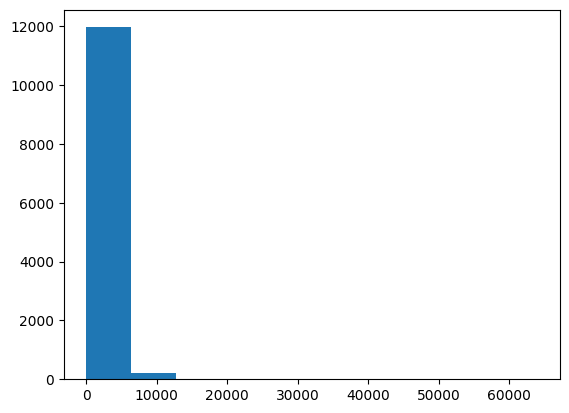

In [ ]:
plt.hist(df.ProductRelated_Duration);

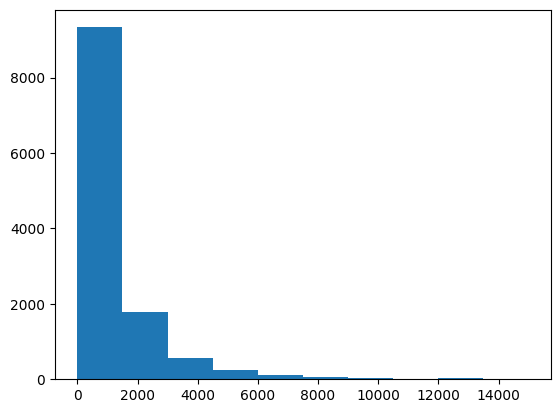

In [ ]:
plt.hist(df[df['ProductRelated_Duration'] < 15000].ProductRelated_Duration);

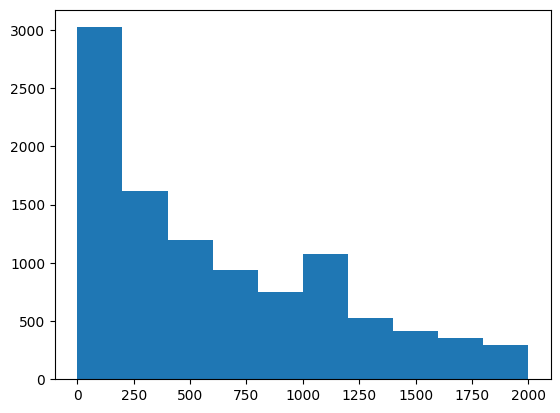

In [ ]:
plt.hist(df[df['ProductRelated_Duration'] < 2000].ProductRelated_Duration);

#### Чем ближе к нулю, тем плотнее распределение Product Related Duration. Подавляющее большинство значений не превосходят 5000, хотя редкие выбросы достигают десятков тысяч.

## Задание 5

Какая доля среди всех клиентов провела 0 минут/секунд на страницах, посвященных продукту? Ответ переведите в проценты и округлите до целого числа.

In [ ]:
df[df['ProductRelated_Duration'] == 0].shape[0] / df.shape[0]

0.05032321413959578

Ответ: 5%

## Задание 6

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.


<ipython-input-25-41f1c8b549f0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')


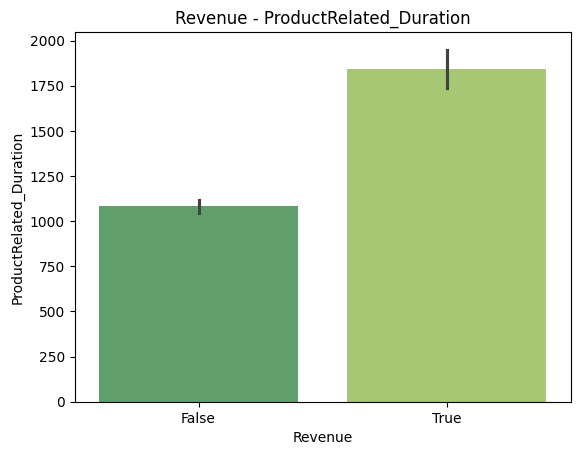

In [ ]:
sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')
plt.title('Revenue - ProductRelated_Duration')
plt.show()

In [ ]:
df[df['Revenue'] == False]['ProductRelated_Duration'].mean(), df[df['Revenue']]['ProductRelated_Duration'].mean()

(1081.9917527695022, 1843.9902905018646)

In [ ]:
df[df['Revenue']]['ProductRelated_Duration'].mean() / df[df['Revenue'] == False]['ProductRelated_Duration'].mean()

1.7042554028548975

В сессиях, приведших к покупке, клиенты в среднем тратили значительно (на 70%) больше времени на страницах, посвященных продукту.

## Задание 7

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

m0 - среднее значение ProductRelated_Duration при Revenue = False, m1 - среднее значение ProductRelated_Duration при Revenue = True.
H0: m0 == m1; H1: m0 != m1.

In [ ]:
from statsmodels.stats.weightstats import ztest

sample0 = df[df.Revenue == False]['ProductRelated_Duration']
sample1 = df[df.Revenue == True]['ProductRelated_Duration']

z_stat, p_value = ztest(sample0, sample1, alternative='two-sided', usevar='unequal')
print("Z-статистика:", z_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Z-статистика: -13.86088001088561
P-значение: 1.0932565509800454e-43
Отвергаем нулевую гипотезу: средние значимо различаются


In [ ]:
# Сравниваем две группы с не нормальным распределением -> тест Манна-Уитни
# from scipy.stats import mannwhitneyu

# sample0 = df[df.Revenue == False]['ProductRelated_Duration']
# sample1 = df[df.Revenue == True]['ProductRelated_Duration']

# statistic, p_value = mannwhitneyu(sample0, sample1)

# print("Статистика теста Манна-Уитни:", statistic)
# print("p-значение:", p_value)

# alpha = 0.05
# if p_value < alpha:
#     print("Отвергаем нулевую гипотезу: средние значимо различаются")
# else:
#     print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 6636573.5
p-значение: 2.7163290058899774e-113
Отвергаем нулевую гипотезу: средние значимо различаются


## Задание 8

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

Z-тест. Сравниваем среднее в двух группах. При этом данных очень много (N >> 30), так что, по закону больших чисел, можно считать распределение средних нормальным.

## Задание 9

Постройте матрицу корреляций всех числовых столбцов друг с другом. Используйте корреляцию Спирмена.

Какой столбец наиболее сильно коррелирует с Revenue? В ответе укажите значение коэффициента корреляции, округленного до сотых.

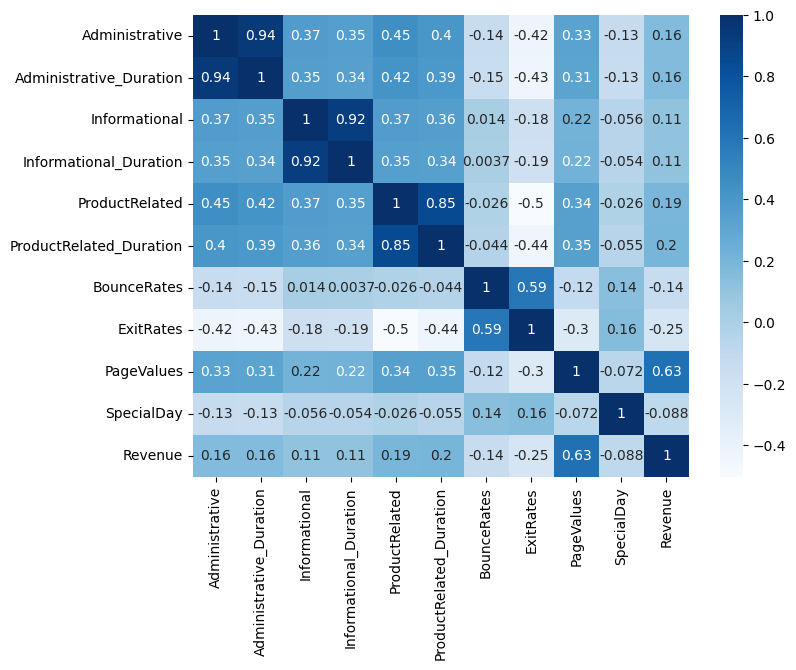

In [ ]:
corr = df[numerical + target].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Blues", annot=True);
# Максимальная корреляцию с PageValues

Ответ: 0.63

## Задание 10

Возьмите столбец, который имеет корреляцию с Revenue, равную по модулю 0.14, и проведите анализ этого столбца по аналогии с тем, как вы действовали со столбцом ProductRelated_Duration.

Постройте гистограмму распределения столбца. Какое у него распределение?

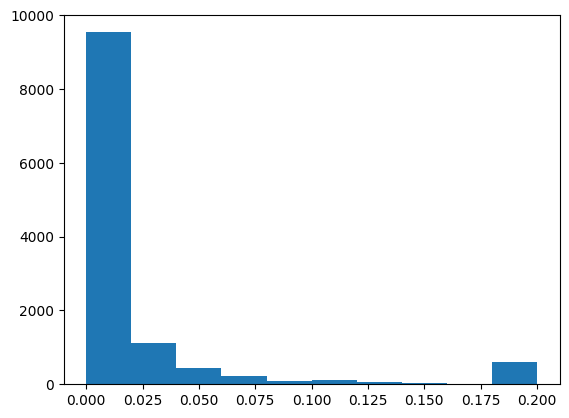

In [ ]:
# Корреляцию с Revenue, равную по модулю 0.14, имеет столбец BounceRates
plt.hist(df.BounceRates);

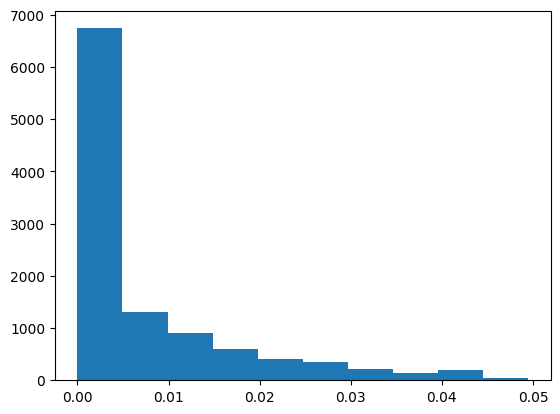

In [ ]:
plt.hist(df[df['BounceRates'] < 0.05].BounceRates);

In [ ]:
df[df['BounceRates'] > 0.15].shape, df[df['BounceRates'] == 0.2].shape

((612, 18), (591, 18))

Распределение сильно смещено влево, с пиком между 0 и 0.01. Так же имеется весьма много (591) значений, равных 0.2.

## Задание 11

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.

<ipython-input-44-35548e23dcfd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')


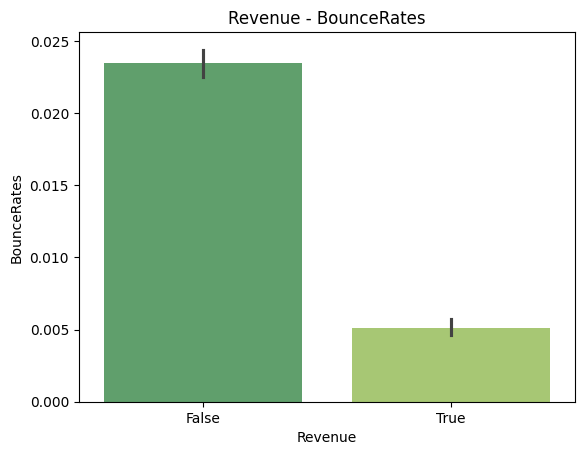

In [ ]:
sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')
plt.title('Revenue - BounceRates')
plt.show()

In [ ]:
df[df['Revenue'] == False]['BounceRates'].mean(), df[df['Revenue']]['BounceRates'].mean()

(0.02347097779171919, 0.005117152640461215)

In [ ]:
df[df['Revenue'] == False]['BounceRates'].mean() / df[df['Revenue']]['BounceRates'].mean()

4.586726142608035

При совершении покупки, BounceRates намного меньше (в 4.6 раз).

## Задание 12

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

In [ ]:
from statsmodels.stats.weightstats import ztest

sample0 = df[df.Revenue == False]['BounceRates']
sample1 = df[df.Revenue == True]['BounceRates']

z_stat, p_value = ztest(sample0, sample1, alternative='two-sided', usevar='unequal')
print("Z-статистика:", z_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Z-статистика: 32.96857561482236
P-значение: 2.2921700127329423e-238
Отвергаем нулевую гипотезу: средние значимо различаются


## Задание 13

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

Z-тест. Сравниваем среднее в двух группах. При этом даных очень много (N >> 30), так что, по закону больших чисел, можно считать распределение средних нормальным.

## Задание 14

Столбцы OperatingSystems, Browser, Region, TrafficType, Weekend - на самом деле категориальные, а не числовые. Измените тип этих столбцов на `object`.

На данных момент сколько теперь столбцов в таблице имеют тип `object`?

In [ ]:
df['OperatingSystems'] = df['OperatingSystems'].astype(object)
df['Browser'] = df['Browser'].astype(object)
df['Region'] = df['Region'].astype(object)
df['TrafficType'] = df['TrafficType'].astype(object)
df['Weekend'] = df['Weekend'].astype(object)
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                       bool
dtype: object

In [ ]:
list(df.dtypes)

[dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('bool')]

In [ ]:
list(df.dtypes).count('O')

7

Ответ: 7

## Задание 15

Переведите Revenue в категории по правилу: True -> Yes, False -> No.

После этого постройте аналог матрицы корреляций между парами категориальных столбцов с помощью V-меры Крамера.

Какой категориальный столбец сильнее всего "коррелирует" с Revenue?



In [ ]:
df['Revenue'] = df['Revenue'].apply(lambda x: 'Yes' if x else 'No')
df['Revenue'] = df['Revenue'].astype(object)
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
782,4,130.0,0,0.000000,28,818.791667,0.000000,0.003448,0.0,0.0,Mar,2,2,1,2,New_Visitor,False,No
9166,1,25.5,0,0.000000,0,0.000000,0.000000,0.066667,0.0,0.0,Nov,1,1,8,8,New_Visitor,False,Yes
4680,5,454.0,1,34.724502,29,1514.600000,0.022222,0.029113,0.0,0.0,May,3,2,1,6,Returning_Visitor,False,No
31,0,0.0,0,0.000000,3,78.000000,0.000000,0.066667,0.0,0.0,Feb,1,2,6,6,Returning_Visitor,True,No
12321,0,0.0,0,0.000000,6,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,No


In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [ ]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,1.000000,0.062831,0.066652,0.046936,0.190177,0.137443,0.065412,0.175961
OperatingSystems,0.062831,1.000000,0.594720,0.114603,0.191472,0.453646,0.119875,0.078437
Browser,0.066652,0.594720,1.000000,0.125797,0.189186,0.504222,0.087512,0.048904
Region,0.046936,0.114603,0.125797,1.000000,0.085438,0.174016,0.029911,0.028040
TrafficType,0.190177,0.191472,0.189186,0.085438,1.000000,0.375859,0.150928,0.171864
VisitorType,0.137443,0.453646,0.504222,0.174016,0.375859,1.000000,0.053418,0.103550
Weekend,0.065412,0.119875,0.087512,0.029911,0.150928,0.053418,1.000000,0.027858
Revenue,0.175961,0.078437,0.048904,0.028040,0.171864,0.103550,0.027858,1.000000


Ответ: наибольшая корреляция у Revenue с Month

Верните Revenue обратно к типу Bool.

In [ ]:
df['Revenue'] = df['Revenue'].apply(lambda x: True if x == 'Yes' else False)
df['Revenue'] = df['Revenue'].astype(bool)
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
516,0,0.0,0,0.0,17,927.166667,0.000000,0.014706,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False
6514,0,0.0,2,5.0,5,122.400000,0.028571,0.042857,0.0,0.0,Jul,3,2,2,4,Returning_Visitor,True,False
6577,0,0.0,0,0.0,5,0.000000,0.200000,0.200000,0.0,0.0,Jul,3,2,3,1,Returning_Visitor,True,False
5675,0,0.0,2,38.2,39,873.000000,0.010000,0.020000,0.0,0.0,Sep,1,1,1,4,Returning_Visitor,False,False
3290,0,0.0,0,0.0,8,463.000000,0.000000,0.025000,0.0,0.0,May,2,2,3,2,Returning_Visitor,False,False


## Задание 16

Постройте матрицу $\phi_k$-корреляций всех столбцов в таблице.

Какой фактор сильнее всего коррелирует с Revenue? В ответе укажите значение корреляции, округленное до сотых.

In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.4 MB/s eta 0:00:00


<Axes: >

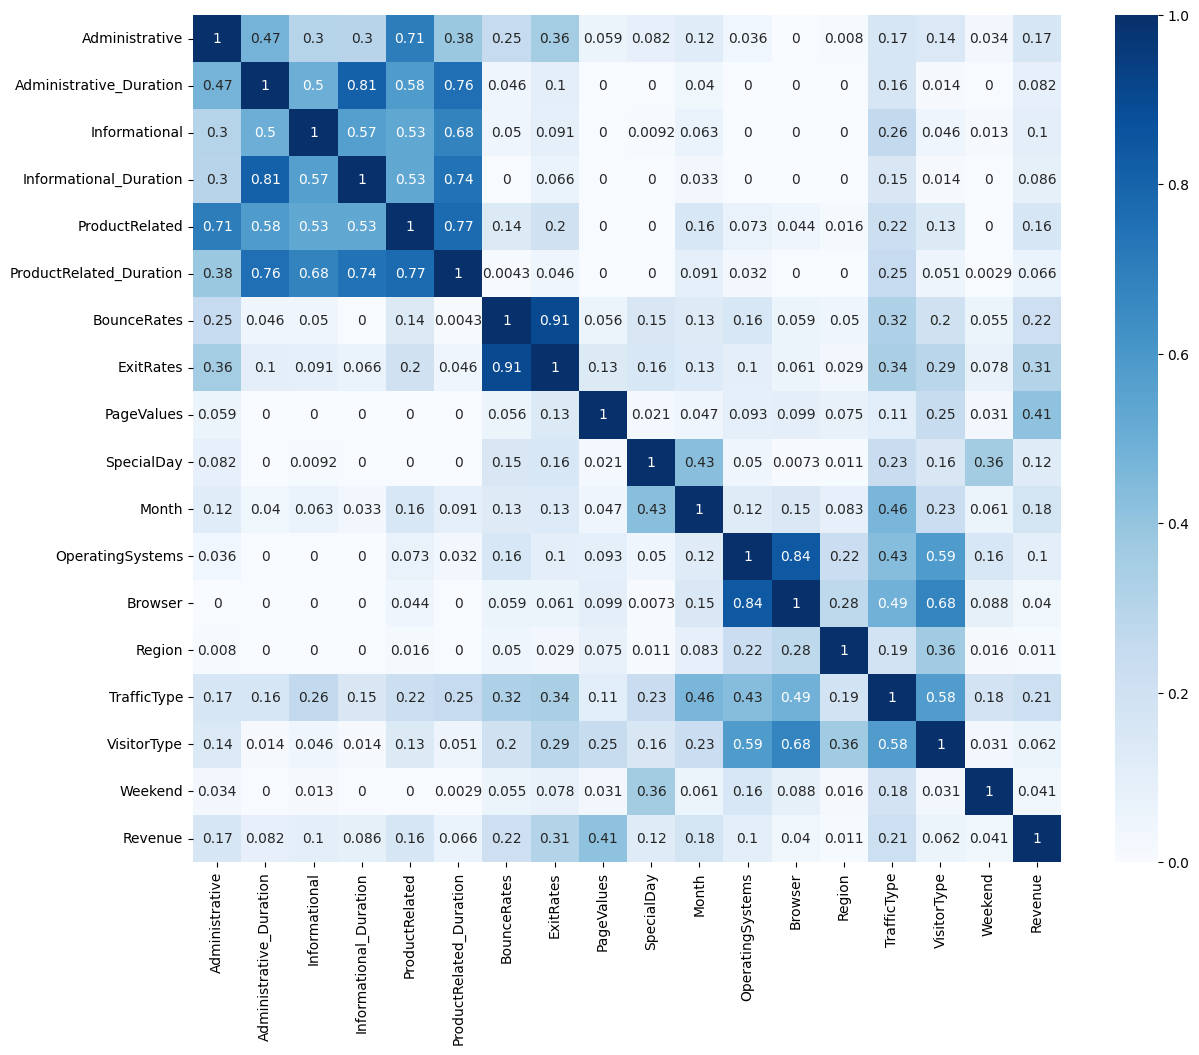

In [ ]:
import phik

plt.figure(figsize=(14, 11))

# ph = df.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

Наибольшая корреляция у Revenue с PageValues

Ответ: 0.41

## Задание 17

Постройте любой из рассмотренных в первом занятии курса дашборд по данным, сохраните его в html и скачайте себе на компьютер.

Выложите файл с дашбордом на яндекс/гугл-диск и прикрепите ссылку на него в этом задании.

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.8 MB 22.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df_copy, title='Online Shoppers Purchasing Intention Report')

In [ ]:
profile_report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile_report.to_file('Purchasing_Intention_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

https://drive.google.com/file/d/1X0r9dtzLRGB0RcXkUZYPAIQev9OS8f-Q/view?usp=sharing

## Задание 18

Наша цель - понять, какие факторы сильнее всего влияют на Revenue и почему.

Проанализируйте построенный дашборд и ответьте текстом на вопросы:

1) Есть ли проблемы в данных (пропуски, дубли, выбросы, ошибочные значения)?

2) Какие три фактора имеют наиболее сильное влияние на Revenue?

3) Постарайтесь описать смысл каждого из этих факторов, а также для каждого из этих факторов объясните по смыслу, почему он сильно влияет на Revenue

4) Укажите два наиболее коррелирующих между собой фактора (без учета Revenue) и объясните, почему между ними такая большая корреляция?

1) В столбцах Informational_Duration, ProductRelated_Duration и ExitRates есть пропущенные значения. Есть 69 повторяющихся записей (вероятно, это не ошибка (или, точнее, ошибка не в этом)). Есть множество записей с граничными значениями в числовых полях. Это похоже на невозможность корректно считать данные в некоторых случаях.

2) У Revenue есть корреляция 0.413 с PageValues, 0.245 с ExitRates и 0.175 с Month.

3) PageValues - средняя ценность страниц, посещённых за сессию, где ценность конкретной страницы - это оцениваемый доход, приносимый данной страницей. Ценность страницы определяется суммой, которую клиенты потратили благодаря этой странице. Следовательно, чем больше средняя ценность страницы в сессии, тем больше шанс совершения покупки (зависимость ослабляется тем, что сумма покупок и количество покупок - это не одно и то же, тем, что средняя ценность не идеально подходит для сравнения сессий с сильно различающимся количеством посещённых страниц и тем, что оценённая ценность страниц отличается от истинной. По этим причинам корреляция хоть и большая, но всё же далека от единицы).

ExitRates - Exit Rate для страницы - это процент визитов на страницу, после которых клиент покинул сайт. Трудно понять, что такое Exit Rate сессии. Возможно, это Exit Rate последней страницы сессии или средний Exit Rate страниц сессии. В таком случае будет присутствовать некоторая корреляция этого параметра с фактом совершения покупки за счёт того, что страницы завершения оплаты имеют очень высокий Exit Rate.

Month - месяц, в который произошла сессия. Некоторые покупки сезонные, некоторые совершаются в разы чаще перед праздниками. То что в некоторые месяца сессии, заканчивающиеся покупками случаются чаще, а сессии "просто посмотреть", соответственно, реже совсем не удивительно.

4) Максимальная корреляция у Informational и Informational_Duration: 0.951. Это абсолютно естественно, что количество страниц определённого типа, посещённых пользователем очень сильно коррелирует (вероятно, присутствие зависимости близкой к линейной) с суммарным временем потраченных на этих страницах. То, что корреляция оказалась максимальной именно у информационных страниц, а не у продуктовых или административных может быть объяснено тем, что для них зависимость между количеством страниц и потраченным временем более однозначная: если клиент решил посетить больше информационных страниц, то он скорее всего прочитал всю информацию на предыдущих (потратил время). То есть зависимость между количеством страниц и потраченным временем похожа на линейную. В то же время, для, например, продуктовых страниц всё труднее: часто встречаются как те, кто тщательно рассмотрит пару продуктов, и, разочаровавшись, покинет сайт (много времени, мало страниц), так и те, кто бегло проглядят много продуктов (мало времени, много страниц). Обе эти группы людей будут добавлять к простой положительной линейной зависимости обратный тренд, делая её менее предсказуемой.

## Полезные доп. материалы

* [Введение в проверку гипотез (кратко)](https://www.codecamp.ru/blog/hypothesis-testing/)

* [Введение в проверку гипотез (подробнее)](https://law.bsu.by/pub/11/barvenov_4.pdf)

* [Основные виды распределений](https://habr.com/ru/articles/801101/)